In [23]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [24]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [25]:
batch_size = 64

trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [26]:
trainset[0][0].shape # input features

torch.Size([784])

In [27]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [28]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [29]:
class SoftmaxRegNoHidden(nn.Module):
    def __init__(self, x_dim,y_dim):
        super(SoftmaxRegNoHidden,self).__init__()
        self.linear1 = nn.Linear(x_dim,y_dim)
    def forward(self,X):
        X = self.linear1(X)
        return X

In [30]:
class SoftmaxRegHidden(nn.Module):
    def __init__(self, x_dim,hidden_dim,y_dim):
        super(SoftmaxRegHidden,self).__init__()
        self.linear1 = nn.Linear(x_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,y_dim)
    def forward(self,X):
        X = self.linear1(X)
        X = self.linear2(X)
        return X

In [31]:
x_dim = trainset[0][0].shape[0]
y_dim = 10
hidden_dim = 128
epochs = 100
lr = 0.001

In [32]:
model_without_hidden_layer = SoftmaxRegNoHidden(x_dim,y_dim)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = SGD(model_without_hidden_layer.parameters(),lr=lr)
losses1 = []
accuracy1 = []

In [33]:
print("TRAINING MODEL WITH NO HIDDEN LAYERS")
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model_without_hidden_layer(xi)
        loss = criterion1(output,yi)
        
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses1.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

TRAINING MODEL WITH NO HIDDEN LAYERS
Epoch 1/100, Loss: 1.911215099825788
Epoch 2/100, Loss: 1.3907555265467304
Epoch 3/100, Loss: 1.1207895611267862
Epoch 4/100, Loss: 0.9637354257772727
Epoch 5/100, Loss: 0.8621056011871997
Epoch 6/100, Loss: 0.7909510181402601
Epoch 7/100, Loss: 0.7378059794335986
Epoch 8/100, Loss: 0.6967929616919967
Epoch 9/100, Loss: 0.6638298818805833
Epoch 10/100, Loss: 0.6367096215613616
Epoch 11/100, Loss: 0.614092494792013
Epoch 12/100, Loss: 0.5946431413833012
Epoch 13/100, Loss: 0.5780272294781101
Epoch 14/100, Loss: 0.563424383717051
Epoch 15/100, Loss: 0.5503393092008033
Epoch 16/100, Loss: 0.538824596861278
Epoch 17/100, Loss: 0.5285125764638885
Epoch 18/100, Loss: 0.5191605752592148
Epoch 19/100, Loss: 0.5105594444884929
Epoch 20/100, Loss: 0.5028163339537598
Epoch 21/100, Loss: 0.4955303385091235
Epoch 22/100, Loss: 0.4889478897934021
Epoch 23/100, Loss: 0.4829168328439503
Epoch 24/100, Loss: 0.4772203010218992
Epoch 25/100, Loss: 0.4718895944864003
E

In [34]:
PATH = './mnist-no-hidden-layer.pth'
torch.save(model_without_hidden_layer.state_dict(), PATH)

In [35]:
model_with_hidden_layer = SoftmaxRegHidden(x_dim,hidden_dim,y_dim)
criterion2 = nn.CrossEntropyLoss()
optimizer2 = SGD(model_with_hidden_layer.parameters(),lr=lr)
losses2 = []
accuracy2 = []

In [36]:
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model_with_hidden_layer(xi)
        loss = criterion2(output,yi)
        
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses2.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/100, Loss: 2.1132131603989266
Epoch 2/100, Loss: 1.7461452438378893
Epoch 3/100, Loss: 1.398303803604549
Epoch 4/100, Loss: 1.1253242507290993
Epoch 5/100, Loss: 0.9372929472531846
Epoch 6/100, Loss: 0.8106717616001934
Epoch 7/100, Loss: 0.7229232500865261
Epoch 8/100, Loss: 0.6592888264958539
Epoch 9/100, Loss: 0.6114281120457883
Epoch 10/100, Loss: 0.5741757362572624
Epoch 11/100, Loss: 0.5445227447603302
Epoch 12/100, Loss: 0.5202940994107139
Epoch 13/100, Loss: 0.5002012607703077
Epoch 14/100, Loss: 0.48309241187597896
Epoch 15/100, Loss: 0.4685884731124713
Epoch 16/100, Loss: 0.45625043275958693
Epoch 17/100, Loss: 0.44542287298039335
Epoch 18/100, Loss: 0.4359253287506002
Epoch 19/100, Loss: 0.4271127372694168
Epoch 20/100, Loss: 0.41966130671851926
Epoch 21/100, Loss: 0.4128454824023918
Epoch 22/100, Loss: 0.4065960398646814
Epoch 23/100, Loss: 0.4009627011030722
Epoch 24/100, Loss: 0.3958213046383756
Epoch 25/100, Loss: 0.3911844312763417
Epoch 26/100, Loss: 0.386778795

In [37]:
PATH = './mnist-with-hidden-layer.pth'
torch.save(model_with_hidden_layer.state_dict(), PATH)

Text(0, 0.5, 'Loss')

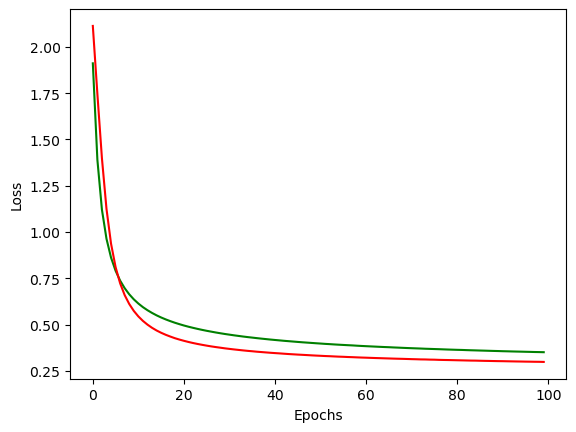

In [38]:
plt.plot(range(epochs),losses1,label = 'without hidden layer',c='g')
plt.plot(range(epochs),losses2,label = 'with hidden layer',c='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [39]:
model_without_hidden_layer.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model_without_hidden_layer(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print("CLASSIFICATION REPORT FOR MODEL WITHOUT HIDDEN LAYERS")
print(classification_report(y_pred=y_pred,y_true=y_true))


CLASSIFICATION REPORT FOR MODEL WITHOUT HIDDEN LAYERS
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.95      0.97      0.96      1135
         2.0       0.92      0.87      0.90      1032
         3.0       0.90      0.90      0.90      1010
         4.0       0.90      0.92      0.91       982
         5.0       0.89      0.84      0.87       892
         6.0       0.93      0.94      0.93       958
         7.0       0.92      0.90      0.91      1028
         8.0       0.86      0.87      0.87       974
         9.0       0.88      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [40]:
model_with_hidden_layer.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model_with_hidden_layer(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print("CLASSIFICATION REPORT FOR MODEL WITH HIDDEN LAYERS")
print(classification_report(y_pred=y_pred,y_true=y_true))


CLASSIFICATION REPORT FOR MODEL WITH HIDDEN LAYERS
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       980
         1.0       0.96      0.98      0.97      1135
         2.0       0.93      0.89      0.91      1032
         3.0       0.90      0.91      0.90      1010
         4.0       0.91      0.93      0.92       982
         5.0       0.89      0.86      0.88       892
         6.0       0.93      0.95      0.94       958
         7.0       0.93      0.92      0.92      1028
         8.0       0.88      0.88      0.88       974
         9.0       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Hence we can see that by adding just 1 hidden (that too just a Linear layer) improved the model performance slightly by providing more accuracy and decreasing loss for same no. of epochs